11501568/11490434 [==============================] - 3s 0us/step
Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2389 - accuracy: 0.9311 - val_loss: 0.1462 - val_accuracy: 0.9561
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1020 - accuracy: 0.9690 - val_loss: 0.1020 - val_accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0719 - accuracy: 0.9773 - val_loss: 0.0925 - val_accuracy: 0.9714
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0546 - accuracy: 0.9824 - val_loss: 0.0811 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0437 - accuracy: 0.9858 - val_loss: 0.0868 - val_accuracy: 0.9756
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.0921 - val_accuracy: 0.9752
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - 

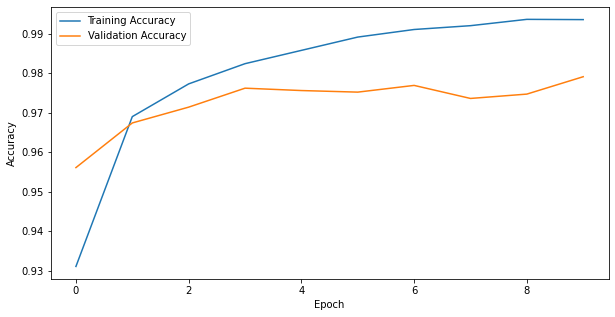

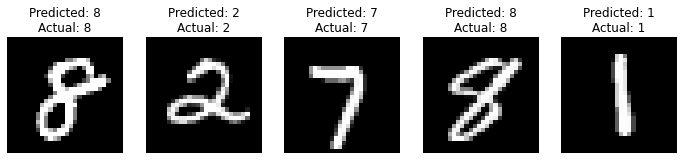

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions
num_samples = 5
random_indices = np.random.randint(0, len(x_test), num_samples)
predictions = model.predict(x_test[random_indices])
predicted_labels = np.argmax(predictions, axis=1)

# Display predicted images and labels
plt.figure(figsize=(12, 6))
for i, index in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}\nActual: {np.argmax(y_test[index])}')
    plt.axis('off')
plt.show()
